<a href="https://colab.research.google.com/github/4druux/4druux/blob/main/DecisionAndKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io

In [293]:
### Dataset ###
dataset = """ID,Umur,Pendapatan (juta),Jumlah Pembelian,Target Loyalitas DT,Target Loyalitas KNN
1,25,50,10,Loyal,Loyal
2,40,80,5,Tidak Loyal,Loyal
3,30,60,8,Loyal,Tidak Loyal
4,50,90,4,Tidak Loyal,Tidak Loyal
"""

In [294]:
df = pd.read_csv(io.StringIO(dataset))
print("Dataset e-commerce:")
print(df)

Dataset e-commerce:
   ID  Umur  Pendapatan (juta)  Jumlah Pembelian Target Loyalitas DT  \
0   1    25                 50                10               Loyal   
1   2    40                 80                 5         Tidak Loyal   
2   3    30                 60                 8               Loyal   
3   4    50                 90                 4         Tidak Loyal   

  Target Loyalitas KNN  
0                Loyal  
1                Loyal  
2          Tidak Loyal  
3          Tidak Loyal  


In [295]:
### Decision Tree ###
x = df[['Umur', 'Pendapatan (juta)', 'Jumlah Pembelian']]
y_dt = df['Target Loyalitas DT']

print("Fitur (x):")
print(x)
print("\nTarget Decision Tree (y_dt):")
print(y_dt)

Fitur (x):
   Umur  Pendapatan (juta)  Jumlah Pembelian
0    25                 50                10
1    40                 80                 5
2    30                 60                 8
3    50                 90                 4

Target Decision Tree (y_dt):
0          Loyal
1    Tidak Loyal
2          Loyal
3    Tidak Loyal
Name: Target Loyalitas DT, dtype: object


In [296]:
### KNN ###
x = df[['Umur', 'Pendapatan (juta)', 'Jumlah Pembelian']]
y_knn = df['Target Loyalitas KNN']

print("Fitur (x):")
print(x)
print("\nTarget KNN (y_knn):")
print(y_knn)

Fitur (x):
   Umur  Pendapatan (juta)  Jumlah Pembelian
0    25                 50                10
1    40                 80                 5
2    30                 60                 8
3    50                 90                 4

Target KNN (y_knn):
0          Loyal
1          Loyal
2    Tidak Loyal
3    Tidak Loyal
Name: Target Loyalitas KNN, dtype: object


y = df['Target Loyalitas']
print("Target (y):")
print(y)


In [297]:
#### Algorithma Decision Tree ####

In [298]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_dt, test_size=0.2, random_state=42)

print("Data Training (x_train):")
print(x_train)
print("\nTarget Training (y_train):")
print(y_train)
print("\nData Testing (x_test):")
print(x_test)
print("\nTarget Testing (y_test):")
print(y_test)

Data Training (x_train):
   Umur  Pendapatan (juta)  Jumlah Pembelian
3    50                 90                 4
0    25                 50                10
2    30                 60                 8

Target Training (y_train):
3    Tidak Loyal
0          Loyal
2          Loyal
Name: Target Loyalitas DT, dtype: object

Data Testing (x_test):
   Umur  Pendapatan (juta)  Jumlah Pembelian
1    40                 80                 5

Target Testing (y_test):
1    Tidak Loyal
Name: Target Loyalitas DT, dtype: object


In [299]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [300]:
e_commerce_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
e_commerce_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [301]:
print("Model Decision Tree berhasil dilatih menggunakan data training.")
print("Urutan kelas internal model:", e_commerce_dt.classes_)

Model Decision Tree berhasil dilatih menggunakan data training.
Urutan kelas internal model: ['Loyal' 'Tidak Loyal']


In [302]:
y_pred_dt = e_commerce_dt.predict(x_test)
print("Hasil Prediksi Decision Tree pada data testing:", y_pred_dt)
print("Target Sebenarnya pada data testing:", y_test.values)

Hasil Prediksi Decision Tree pada data testing: ['Tidak Loyal']
Target Sebenarnya pada data testing: ['Tidak Loyal']


In [303]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi DT:", accuracy_dt)

Akurasi DT: 1.0


In [304]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

labels_dt = e_commerce_dt.classes_
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=labels_dt)

print("\nConfusion Matrix (Data Testing):")
print(conf_matrix_dt)


Confusion Matrix (Data Testing):
[[0 0]
 [0 1]]


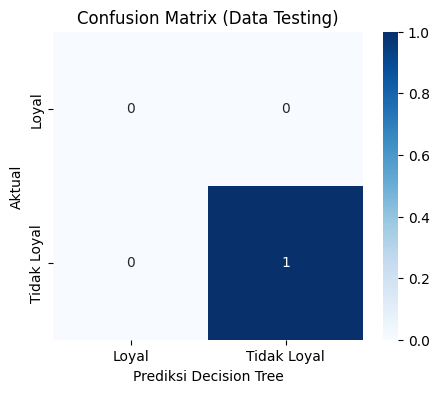

In [305]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_dt, yticklabels=labels_dt)
plt.xlabel('Prediksi Decision Tree')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (Data Testing)')
plt.show()

Visualisasi Pohon Keputusan (dilatih pada data training):


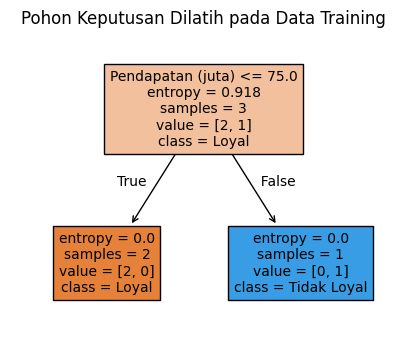

In [306]:
print("Visualisasi Pohon Keputusan (dilatih pada data training):")
fig = plt.figure(figsize=(5, 4))
tree.plot_tree(e_commerce_dt,
               feature_names=x.columns,
               class_names=labels_dt,
               filled=True,
               fontsize=10)
plt.title("Pohon Keputusan Dilatih pada Data Training")
plt.show()

In [307]:
#### Algorithma KNN ####

In [308]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [309]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(
    x, y_knn, test_size=0.2, random_state=42
)

print("Data Training KNN (x_train_knn):")
print(x_train_knn)
print("\nTarget Training KNN (y_train_knn):")
print(y_train_knn)
print("\nData Testing KNN (x_test_knn):")
print(x_test_knn)
print("\nTarget Testing KNN (y_test_knn):")
print(y_test_knn)

Data Training KNN (x_train_knn):
   Umur  Pendapatan (juta)  Jumlah Pembelian
3    50                 90                 4
0    25                 50                10
2    30                 60                 8

Target Training KNN (y_train_knn):
3    Tidak Loyal
0          Loyal
2    Tidak Loyal
Name: Target Loyalitas KNN, dtype: object

Data Testing KNN (x_test_knn):
   Umur  Pendapatan (juta)  Jumlah Pembelian
1    40                 80                 5

Target Testing KNN (y_test_knn):
1    Loyal
Name: Target Loyalitas KNN, dtype: object


In [310]:
scaler = StandardScaler()
scaler.fit(x_train_knn)
x_train_scaled = scaler.transform(x_train_knn)
x_test_scaled = scaler.transform(x_test_knn)

print("Data Training Setelah Scaling (x_train_scaled):")
print(x_train_scaled)
print("\nData Testing Setelah Scaling (x_test_scaled):")
print(x_test_scaled)

Data Training Setelah Scaling (x_train_scaled):
[[ 1.38873015  1.37281295 -1.33630621]
 [-0.9258201  -0.98058068  1.06904497]
 [-0.46291005 -0.39223227  0.26726124]]

Data Testing Setelah Scaling (x_test_scaled):
[[ 0.46291005  0.78446454 -0.93541435]]


In [311]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train_scaled, y_train_knn)

print(f"Model KNN berhasil dilatih menggunakan data training yang di-scaling.")
print("Urutan kelas internal model KNN:", knn_model.classes_)

Model KNN berhasil dilatih menggunakan data training yang di-scaling.
Urutan kelas internal model KNN: ['Loyal' 'Tidak Loyal']


In [312]:
y_pred_knn = knn_model.predict(x_test_scaled)
print(f"Hasil Prediksi KNN pada data testing:", y_pred_knn)
print("Target Sebenarnya pada data testing:", y_test_knn.values)

Hasil Prediksi KNN pada data testing: ['Tidak Loyal']
Target Sebenarnya pada data testing: ['Loyal']


In [313]:
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print("Akurasi KNN:", accuracy_knn)

Akurasi KNN: 0.0


In [314]:
labels_knn = knn_model.classes_
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn, labels=labels_knn)
print("\nConfusion Matrix KNN (Data Testing):")
print(conf_matrix_knn)


Confusion Matrix KNN (Data Testing):
[[0 1]
 [0 0]]


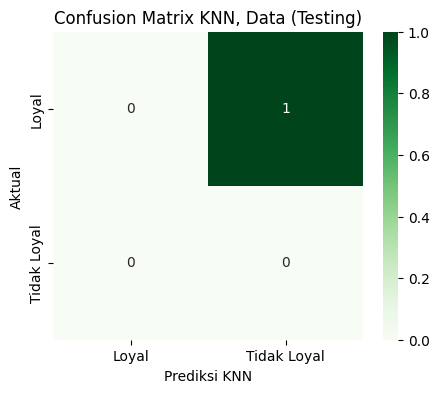

In [336]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels_knn, yticklabels=labels_knn)
plt.xlabel('Prediksi KNN')
plt.ylabel('Aktual')
plt.title('Confusion Matrix KNN, Data (Testing)')
plt.show()

In [334]:
### KESIMPULAN ANALISIS ###

Kesimpulan Analisis Decision Tree vs KNN

--- Hasil pada Data Testing (Sampel Index 1) ---
Decision Tree (DT):
  - Target Aktual (DT): 'Tidak Loyal'
  - Prediksi DT       : 'Tidak Loyal'
  - Hasil Klasifikasi : `True`

KNN:
  - Target Aktual (KNN): 'Loyal'
  - Prediksi KNN       : 'Tidak Loyal'
  - Hasil Klasifikasi  : `False`

--- Akurasi Model ---
Akurasi Decision Tree: 1.0
Akurasi KNN          : 0.0

--- Visualisasi Confusion Matrix ---


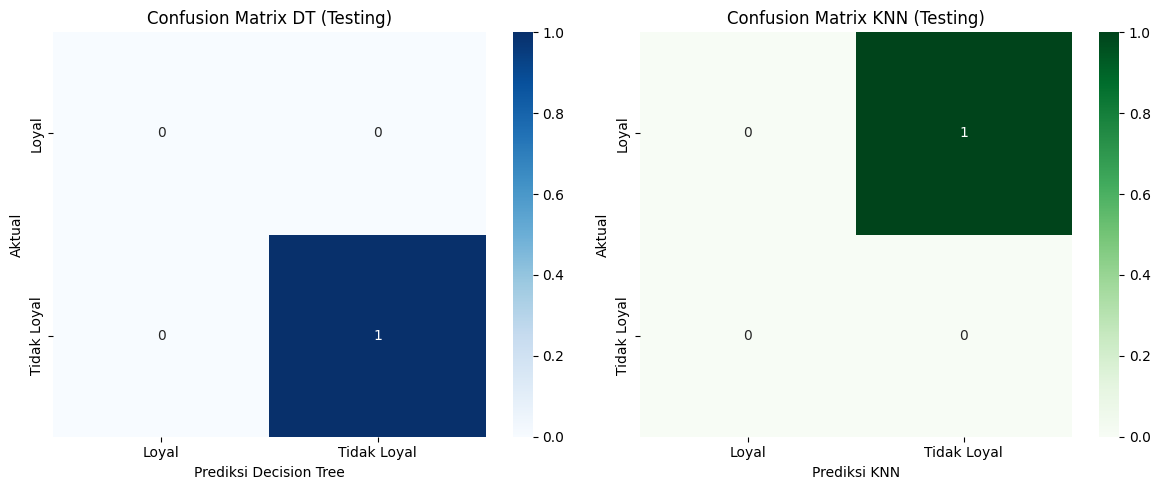

In [335]:
print("="*50)
print("Kesimpulan Analisis Decision Tree vs KNN")
print("="*50)

actual_dt = y_test.values[0]
predicted_dt = y_pred_dt[0]
actual_knn = y_test_knn.values[0]
predicted_knn = y_pred_knn[0]

print("\n--- Hasil pada Data Testing (Sampel Index 1) ---")
print(f"Decision Tree (DT):")
print(f"  - Target Aktual (DT): '{actual_dt}'")
print(f"  - Prediksi DT       : '{predicted_dt}'")
print(f"  - Hasil Klasifikasi : `{actual_dt == predicted_dt}`")
print(f"\nKNN:")
print(f"  - Target Aktual (KNN): '{actual_knn}'")
print(f"  - Prediksi KNN       : '{predicted_knn}'")
print(f"  - Hasil Klasifikasi  : `{actual_knn == predicted_knn}`")

print("\n--- Akurasi Model ---")
print(f"Akurasi Decision Tree: {accuracy_dt}")
print(f"Akurasi KNN          : {accuracy_knn}")

print("\n--- Visualisasi Confusion Matrix ---")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_dt, yticklabels=labels_dt, ax=axes[0])
axes[0].set_xlabel('Prediksi Decision Tree')
axes[0].set_ylabel('Aktual')
axes[0].set_title('Confusion Matrix DT (Testing)')

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels_knn, yticklabels=labels_knn, ax=axes[1])
axes[1].set_xlabel('Prediksi KNN')
axes[1].set_ylabel('Aktual')
axes[1].set_title('Confusion Matrix KNN (Testing)')

plt.tight_layout()
plt.show()